In [1]:
import requests
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [7]:
LOCAL_FILE_NAME=r"OHID-1\hrnavy-OHID-1-220e32e\images\201912_7.tif"
image_file = rasterio.open(LOCAL_FILE_NAME)
image_arr = image_file.read()

print(f"Image shape: {image_arr.shape}")
#print(f"Image bands: {', '.join(image_file.descriptions)}")

Image shape: (32, 512, 512)


In [12]:
NAN_VALUE = -9999
def min_max_normalize(arr: np.ndarray) -> np.ndarray:
    """Top-of-Atmosphere Radiance. These values
    are out of the range that matplotlib is expecting. We need to scale
    our image values to 0-1 or 0-255. This function does this, as well
    as replacing the NaN value (-9999) with an actual NaN value.

    Args:
        arr (np.ndarray): Input array requiring scaling

    Returns:
        np.ndarray: Scaled output array w/ NaN's added
    """
    arr = np.where(arr == NAN_VALUE, np.nan, arr)
    # nanmin/nanmax ignore NaN values within an array while still calculating the value (max, min)
    return (arr - np.nanmin(arr)) / (np.nanmax(arr) - np.nanmin(arr))

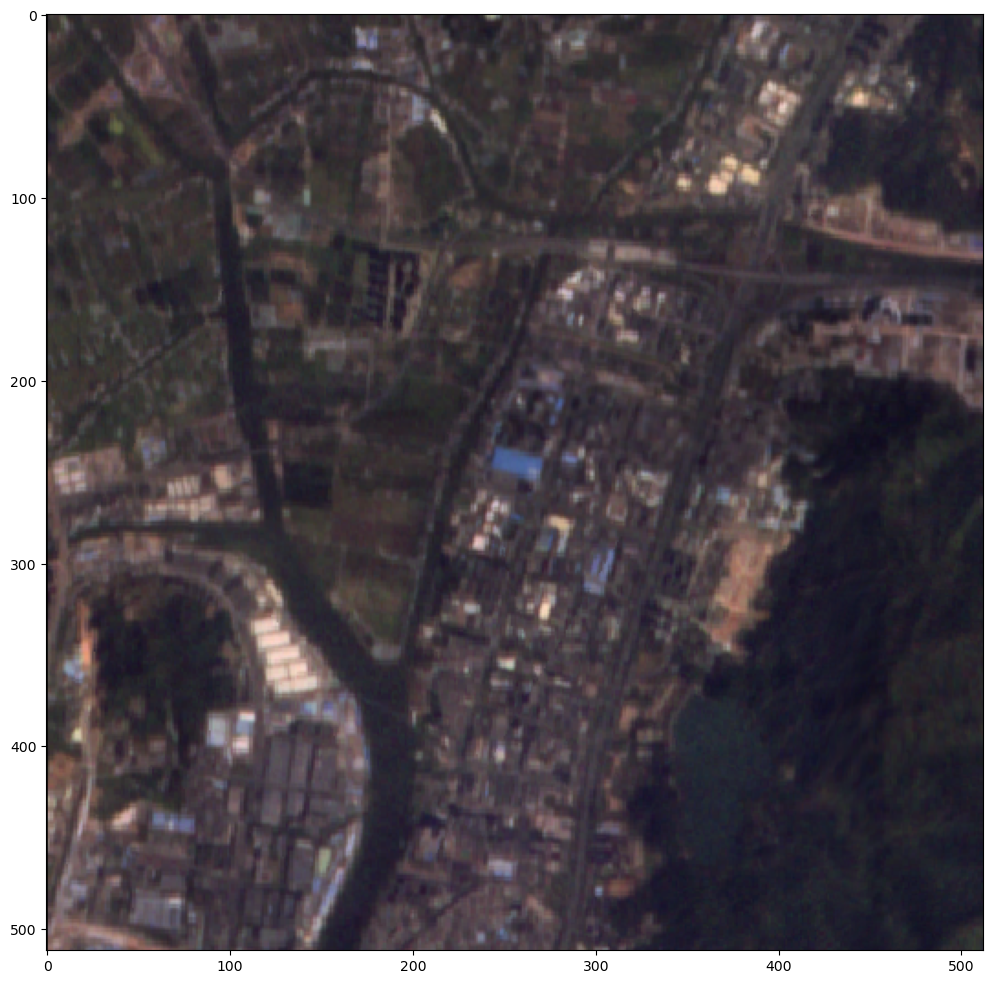

In [17]:
rgb_arr = image_arr[[10, 4, 0], :, :].swapaxes(0, -1)

# Then we can normalize our image and plot the result!
# We specify a larger figsize to get a better resolution out of the image. You can
# increase this further to further improve resolution! (at the expense of file size)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(min_max_normalize(rgb_arr))

# For fun, let's also export this as an image!
plt.tight_layout()
plt.savefig("sample_rgb.png")

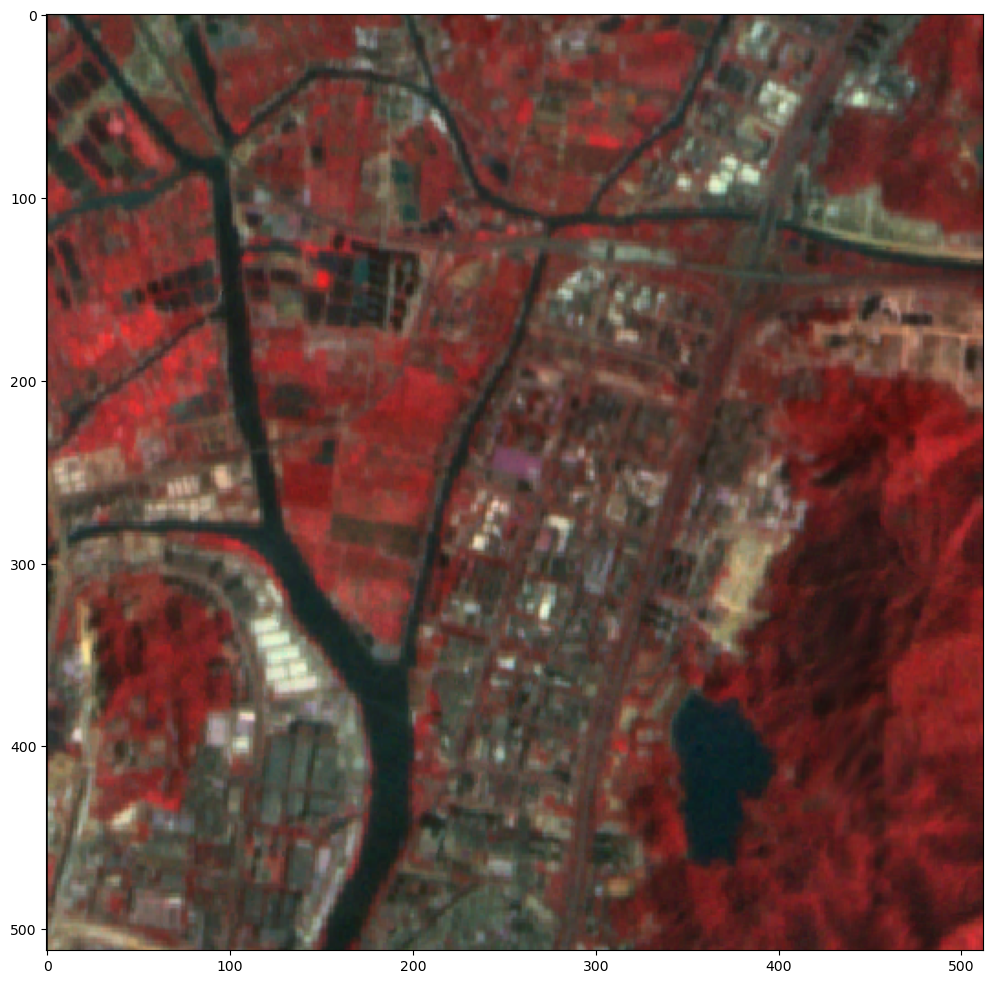

In [16]:
# Now, let's do the same with color infrared!
cir_arr = image_arr[[19, 10, 4], :, :].swapaxes(0, -1)

# Then we can normalize our image and plot the result!
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(min_max_normalize(cir_arr))

# For fun, let's also export this as an image!
plt.tight_layout()
plt.savefig("sample_ir.png")